# ДЗ1
## 1. Получение и предобработка данных

**Рассмотрим датасет по Ожидаемая продолжительность жизни (ВОЗ)**

- Country                              - страна
- Year                                  - год
- Status                               - статус(развевающаяся, развитая )
- Life expectancy                     -  продолжительность жизни
- Adult Mortality                     - взрослая смертность (Уровень смертности взрослого населения обоих полов (вероятность                                             смерти в возрасте от 15 до 60 лет на 1000 населения))
- infant deaths                        - детская смертность (Число младенческих смертей на 1000 населения)
- Alcohol                            - Учтенное потребление алкоголя на душу населения (15+) (в литрах чистого спирта)
- percentage expenditure            - Расходы на здравоохранение в процентах от валового внутреннего продукта на душу населения(%)
- Hepatitis B                        - Охват иммунизацией против гепатита В (ГепВ) детей в возрасте 1 года (%)
- Measles                             Корь - количество зарегистрированных случаев на 1000 населения 
- BMI                                - Средний индекс массы тела всего населения
- under-five deaths                   Число смертей детей в возрасте до пяти лет на 1000 населения
- Polio                               - Охват иммунизацией против полиомиелита (Pol3) детей в возрасте 1 года (%)
- Total expenditure                  - Общие государственные расходы на здравоохранение в процентах от общих государственных расходов (%)
- Diphtheria                          - Охват иммунизацией детей в возрасте 1 года от дифтерийно-столбнячного анатоксина и коклюша (АКДС-3) (%)    
- HIV/AIDS                            - Смертность на 1 000 живорождений ВИЧ/СПИД (0–4 года)
- GDP                                 - Валовой внутренний продукт на душу населения (в долларах США)
- Population                        - Население страны
- thinness  1-19 years             - Распространенность худобы среди детей и подростков в возрасте от 10 до 19 лет (%)    
- thinness 5-9 years                - Распространенность худобы среди детей в возрасте от 5 до 9 лет (%)                
- Income composition of resources   -  Индекс человеческого развития с точки зрения доходной структуры ресурсов (индекс от 0 до 1)
- Schooling                          - Количество лет обучения (лет)


**По данным будем предсказывать как на уровень потребления алкоголя влияет на уровень:**
- Регион(Европа, Азия и т.д.), в имеющихся данных его нет, по этому возьмем из внешних источников
- Расходы на здравоохранение
- статус(развевающаяся, развитая)
- Общие государственные расходы на здравоохранение
- Валовой внутренний продукт

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('C:\\Users\\Anton\\Desktop\\учеба\\ML\\ДЗ\\Life Expectancy Data.csv')

In [3]:
# приведем название колонок к нижнему регистру
df.columns = df.columns.str.lower()
df.head()

,country,year,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,...,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# оставляем нужные столбцы
df = df[['country', 'year', 'status', 'alcohol', 'percentage expenditure', 'total expenditure', 'gdp']]
df.head()

,country,year,status,alcohol,percentage expenditure,total expenditure,gdp
0,Afghanistan,2015,Developing,0.01,71.279624,8.16,584.259210
1,Afghanistan,2014,Developing,0.01,73.523582,8.18,612.696514
2,Afghanistan,2013,Developing,0.01,73.219243,8.13,631.744976
3,Afghanistan,2012,Developing,0.01,78.184215,8.52,669.959000
4,Afghanistan,2011,Developing,0.01,7.097109,7.87,63.537231


In [5]:
df['country'].nunique()

193

In [6]:
# выгружаем данные по регионам
df_reg = pd.read_excel('C:\\Users\\Anton\\Desktop\\учеба\\ML\\ДЗ\\world-administrative-boundaries.xlsx')

In [7]:
df_reg.head()

,Geo Point,Geo Shape,ISO 3 territory code,Status,ISO 3 country code,English Name,Continent of the territory,Region of the territory,ISO 3166-1 Alpha 2-Codes,French Name
0,"15.088520065932547, 145.67921950822935","{""coordinates"":[[[[145.63331000000005,14.91236...",MNP,US Territory,USA,Northern Mariana Islands,Oceania,Micronesia,MP,Northern Mariana Islands
1,"44.69121716855731, 147.1622109044358","{""coordinates"":[[[[146.68274000000008,43.70777...",NaN,Sovereignty unsettled,RUS,Kuril Islands,Asia,Eastern Asia,NaN,Kuril Islands
2,"46.5645020539879, 2.551955216777798","{""coordinates"":[[[[9.447500000000048,42.683050...",FRA,Member State,FRA,France,Europe,Western Europe,FR,France
3,"44.031498418616394, 20.805271723235375","{""coordinates"":[[[20.261020000000087,46.114850...",SRB,Member State,SRB,Serbia,Europe,Southern Europe,RS,Serbie
4,"-32.799645341117, -56.01239637788298","{""coordinates"":[[[-53.37429999999995,-33.74066...",URY,Member State,URY,Uruguay,Americas,South America,UY,Uruguay


In [8]:
# приводим название столбцов к нижнему регистру
df_reg.columns = df_reg.columns.str.lower()

In [9]:
df_reg.head()

,geo point,geo shape,iso 3 territory code,status,iso 3 country code,english name,continent of the territory,region of the territory,iso 3166-1 alpha 2-codes,french name
0,"15.088520065932547, 145.67921950822935","{""coordinates"":[[[[145.63331000000005,14.91236...",MNP,US Territory,USA,Northern Mariana Islands,Oceania,Micronesia,MP,Northern Mariana Islands
1,"44.69121716855731, 147.1622109044358","{""coordinates"":[[[[146.68274000000008,43.70777...",NaN,Sovereignty unsettled,RUS,Kuril Islands,Asia,Eastern Asia,NaN,Kuril Islands
2,"46.5645020539879, 2.551955216777798","{""coordinates"":[[[[9.447500000000048,42.683050...",FRA,Member State,FRA,France,Europe,Western Europe,FR,France
3,"44.031498418616394, 20.805271723235375","{""coordinates"":[[[20.261020000000087,46.114850...",SRB,Member State,SRB,Serbia,Europe,Southern Europe,RS,Serbie
4,"-32.799645341117, -56.01239637788298","{""coordinates"":[[[-53.37429999999995,-33.74066...",URY,Member State,URY,Uruguay,Americas,South America,UY,Uruguay


In [10]:
# переименовываем столдец "english name" в "country" для дольнейшего соединения таблиц
df_reg = df_reg.rename(columns = {'english name':'country'})
df_reg.head()

,geo point,geo shape,iso 3 territory code,status,iso 3 country code,country,continent of the territory,region of the territory,iso 3166-1 alpha 2-codes,french name
0,"15.088520065932547, 145.67921950822935","{""coordinates"":[[[[145.63331000000005,14.91236...",MNP,US Territory,USA,Northern Mariana Islands,Oceania,Micronesia,MP,Northern Mariana Islands
1,"44.69121716855731, 147.1622109044358","{""coordinates"":[[[[146.68274000000008,43.70777...",NaN,Sovereignty unsettled,RUS,Kuril Islands,Asia,Eastern Asia,NaN,Kuril Islands
2,"46.5645020539879, 2.551955216777798","{""coordinates"":[[[[9.447500000000048,42.683050...",FRA,Member State,FRA,France,Europe,Western Europe,FR,France
3,"44.031498418616394, 20.805271723235375","{""coordinates"":[[[20.261020000000087,46.114850...",SRB,Member State,SRB,Serbia,Europe,Southern Europe,RS,Serbie
4,"-32.799645341117, -56.01239637788298","{""coordinates"":[[[-53.37429999999995,-33.74066...",URY,Member State,URY,Uruguay,Americas,South America,UY,Uruguay


In [11]:
# оставляем два необходимых нам столбца
df_reg = df_reg[['country', 'region of the territory']]
df_reg.head()

,country,region of the territory
0,Northern Mariana Islands,Micronesia
1,Kuril Islands,Eastern Asia
2,France,Western Europe
3,Serbia,Southern Europe
4,Uruguay,South America


In [12]:
# соединяем талбицы + обновляем индекс делая его отдельным столбцом
df2 = df.merge(df_reg, on = 'country').reset_index()

df2

,index,country,year,status,alcohol,percentage expenditure,total expenditure,gdp,region of the territory
0,0,Afghanistan,2015,Developing,0.01,71.279624,8.16,584.259210,Southern Asia
1,1,Afghanistan,2014,Developing,0.01,73.523582,8.18,612.696514,Southern Asia
2,2,Afghanistan,2013,Developing,0.01,73.219243,8.13,631.744976,Southern Asia
3,3,Afghanistan,2012,Developing,0.01,78.184215,8.52,669.959000,Southern Asia
4,4,Afghanistan,2011,Developing,0.01,7.097109,7.87,63.537231,Southern Asia
...,...,...,...,...,...,...,...,...,...
2917,2917,Zimbabwe,2004,Developing,4.36,0.000000,7.13,454.366654,Eastern Africa
2918,2918,Zimbabwe,2003,Developing,4.06,0.000000,6.52,453.351155,Eastern Africa
2919,2919,Zimbabwe,2002,Developing,4.43,0.000000,6.53,57.348340,Eastern Africa
2920,2920,Zimbabwe,2001,Developing,1.72,0.000000,6.16,548.587312,Eastern Africa


In [13]:
df2['country'].nunique()

192

In [14]:
# пишем функцию для анализа данных в таблице
def tabl_info(df, name_list):
    print('Выведем таблицу', name_list)
    print('*******************************************')
    display(df.head())
    print('*******************************************')
    print('Информация о таблице', name_list)
    print('*******************************************')
    display(df.info())# состав таблицы, формат столбцов, наличие пустых строк
    print('*******************************************')
    print('Наличие пропусков в таблице' , name_list)
    print('*******************************************')
    display(df.isna().sum())# наличие пропусков
    print('*******************************************')
    print('Hаличие дубликатов в таблице' , name_list)
    print('*******************************************')
    display(df.duplicated().sum()) # наличие дубликатов

In [15]:
tabl_info(df2, 'name_list')

Выведем таблицу name_list
*******************************************


,index,country,year,status,alcohol,percentage expenditure,total expenditure,gdp,region of the territory
0,0,Afghanistan,2015,Developing,0.01,71.279624,8.16,584.259210,Southern Asia
1,1,Afghanistan,2014,Developing,0.01,73.523582,8.18,612.696514,Southern Asia
2,2,Afghanistan,2013,Developing,0.01,73.219243,8.13,631.744976,Southern Asia
3,3,Afghanistan,2012,Developing,0.01,78.184215,8.52,669.959000,Southern Asia
4,4,Afghanistan,2011,Developing,0.01,7.097109,7.87,63.537231,Southern Asia


*******************************************
Информация о таблице name_list
*******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    2922 non-null   int64  
 1   country                  2922 non-null   object 
 2   year                     2922 non-null   int64  
 3   status                   2922 non-null   object 
 4   alcohol                  2729 non-null   float64
 5   percentage expenditure   2922 non-null   float64
 6   total expenditure        2697 non-null   float64
 7   gdp                      2490 non-null   float64
 8   region of the territory  2922 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 205.6+ KB


None

*******************************************
Наличие пропусков в таблице name_list
*******************************************


index                        0
country                      0
year                         0
status                       0
alcohol                    193
percentage expenditure       0
total expenditure          225
gdp                        432
region of the territory      0
dtype: int64

*******************************************
Hаличие дубликатов в таблице name_list
*******************************************


0

видим пропуски в данных по алкоголю, расходам на здравоохронение, ВВП, индекс человеческого развития и количестве лет обучения 

Для заполнения пропусков по потреблению алкоголя на душу населения, возьмем среднее по данному показателю по каждой стране.

In [16]:
# делаем табл. с пропусками по алкоголю
df_na = df2[df2['alcohol'].isnull()]
df_na


,index,country,year,status,alcohol,percentage expenditure,total expenditure,gdp,region of the territory
32,32,Algeria,2015,Developing,NaN,0.0,NaN,4132.762920,Northern Africa
48,48,Angola,2015,Developing,NaN,0.0,NaN,3695.793748,Middle Africa
64,64,Antigua and Barbuda,2015,Developing,NaN,0.0,NaN,13566.954100,Caribbean
80,80,Argentina,2015,Developing,NaN,0.0,NaN,13467.123600,South America
96,96,Armenia,2015,Developing,NaN,0.0,NaN,369.654776,Western Asia
...,...,...,...,...,...,...,...,...,...
2842,2842,Venezuela (Bolivarian Republic of),2015,Developing,NaN,0.0,NaN,NaN,South America
2858,2858,Vietnam,2015,Developing,NaN,0.0,NaN,NaN,South-Eastern Asia
2874,2874,Yemen,2015,Developing,NaN,0.0,NaN,NaN,Western Asia
2890,2890,Zambia,2015,Developing,NaN,0.0,NaN,1313.889646,Eastern Africa


In [17]:
# выводим данные по среднему потребнению каждой строноы
df_mean_al = df.groupby('country')['alcohol'].mean()
df_mean_al

country
Afghanistan                           0.014375
Albania                               4.848750
Algeria                               0.406667
Angola                                5.740667
Antigua and Barbuda                   7.949333
                                        ...   
Venezuela (Bolivarian Republic of)    7.420000
Vietnam                               3.087333
Yemen                                 0.047333
Zambia                                2.239333
Zimbabwe                              4.482000
Name: alcohol, Length: 193, dtype: float64

In [18]:
# объеденяем данные из табл. df_na и df_mean_al
df_a = df_na.merge(df_mean_al, on = 'country')
df_a = df_a[['index', 'alcohol_y']]
df_a

,index,alcohol_y
0,32,0.406667
1,48,5.740667
2,64,7.949333
3,80,7.966667
4,96,3.702667
...,...,...
188,2842,7.420000
189,2858,3.087333
190,2874,0.047333
191,2890,2.239333


In [19]:
# объеденяем изночальную таб. df с df_a по индексам и заменяем отсутствующие значения данными из столбца "alcohol_y" полученными при объединении
df222 = df2.merge(df_a, on = 'index', how = 'outer')
df222['alcohol'] = df222['alcohol'].fillna(df222['alcohol_y'])


In [20]:
# проверяем правильность заполнения
df222[df222['country'] == 'Vietnam']

,index,country,year,status,alcohol,percentage expenditure,total expenditure,gdp,region of the territory,alcohol_y
2858,2858,Vietnam,2015,Developing,3.087333,0.0,NaN,NaN,South-Eastern Asia,3.087333
2859,2859,Vietnam,2014,Developing,4.090000,0.0,7.70,NaN,South-Eastern Asia,NaN
2860,2860,Vietnam,2013,Developing,4.000000,0.0,7.17,NaN,South-Eastern Asia,NaN
2861,2861,Vietnam,2012,Developing,4.120000,0.0,6.96,NaN,South-Eastern Asia,NaN
2862,2862,Vietnam,2011,Developing,3.940000,0.0,6.20,NaN,South-Eastern Asia,NaN
2863,2863,Vietnam,2010,Developing,3.930000,0.0,6.36,NaN,South-Eastern Asia,NaN
2864,2864,Vietnam,2009,Developing,3.860000,0.0,6.40,NaN,South-Eastern Asia,NaN
2865,2865,Vietnam,2008,Developing,3.580000,0.0,5.53,NaN,South-Eastern Asia,NaN
2866,2866,Vietnam,2007,Developing,3.010000,0.0,6.90,NaN,South-Eastern Asia,NaN
2867,2867,Vietnam,2006,Developing,2.560000,0.0,5.56,NaN,South-Eastern Asia,NaN


In [21]:
# проверяем остались ли пропуски
df222[df222['alcohol'].isnull()]

,index,country,year,status,alcohol,percentage expenditure,total expenditure,gdp,region of the territory,alcohol_y
1958,1958,Palau,2013,Developing,NaN,344.690631,9.27,1932.122370,Micronesia,NaN
2409,2409,South Sudan,2015,Developing,NaN,0.000000,NaN,758.725782,Middle Africa,NaN
2410,2410,South Sudan,2014,Developing,NaN,46.074469,2.74,1151.861715,Middle Africa,NaN
2411,2411,South Sudan,2013,Developing,NaN,47.444530,2.62,1186.113250,Middle Africa,NaN
2412,2412,South Sudan,2012,Developing,NaN,38.338232,2.77,958.455810,Middle Africa,NaN
2413,2413,South Sudan,2011,Developing,NaN,0.000000,NaN,176.971300,Middle Africa,NaN
2414,2414,South Sudan,2010,Developing,NaN,0.000000,NaN,1562.239346,Middle Africa,NaN
2415,2415,South Sudan,2009,Developing,NaN,0.000000,NaN,1264.789980,Middle Africa,NaN
2416,2416,South Sudan,2008,Developing,NaN,0.000000,NaN,1678.711862,Middle Africa,NaN
2417,2417,South Sudan,2007,Developing,NaN,0.000000,NaN,NaN,Middle Africa,NaN


остались две страны, Palau и South Sudan.
Данный по Южному судану нет вообще, по этому удалим данную страну

In [22]:
# проверим данные по Палау
df[df['country'] == 'Palau']

,country,year,status,alcohol,percentage expenditure,total expenditure,gdp
1958,Palau,2013,Developing,NaN,344.690631,9.27,1932.12237


по Палау в начальной табл. были данные только за 2013 год.
Палау и Южный Судан удаляем из таблицы

In [23]:
# удаляем нулевые значения
df222 = df222.dropna(subset = ['alcohol'])

In [24]:
# проверяем
df222[df222['alcohol'].isnull()]

,index,country,year,status,alcohol,percentage expenditure,total expenditure,gdp,region of the territory,alcohol_y


расходамы на здравоохронение
в этот раз не будем усложнять, посмотрим есть ли 

In [25]:
df_z = df222[df222['total expenditure'].isnull()]

In [26]:
df_z

,index,country,year,status,alcohol,percentage expenditure,total expenditure,gdp,region of the territory,alcohol_y
32,32,Algeria,2015,Developing,0.406667,0.0,NaN,4132.762920,Northern Africa,0.406667
48,48,Angola,2015,Developing,5.740667,0.0,NaN,3695.793748,Middle Africa,5.740667
64,64,Antigua and Barbuda,2015,Developing,7.949333,0.0,NaN,13566.954100,Caribbean,7.949333
80,80,Argentina,2015,Developing,7.966667,0.0,NaN,13467.123600,South America,7.966667
96,96,Armenia,2015,Developing,3.702667,0.0,NaN,369.654776,Western Asia,3.702667
...,...,...,...,...,...,...,...,...,...,...
2842,2842,Venezuela (Bolivarian Republic of),2015,Developing,7.420000,0.0,NaN,NaN,South America,7.420000
2858,2858,Vietnam,2015,Developing,3.087333,0.0,NaN,NaN,South-Eastern Asia,3.087333
2874,2874,Yemen,2015,Developing,0.047333,0.0,NaN,NaN,Western Asia,0.047333
2890,2890,Zambia,2015,Developing,2.239333,0.0,NaN,1313.889646,Eastern Africa,2.239333


In [27]:
# посмотрим сколько данных пропущено по каждой странне
df_z['country'].value_counts()

Democratic People's Republic of Korea    16
Somalia                                  16
Iraq                                      4
Algeria                                   1
Peru                                      1
                                         ..
Greece                                    1
Grenada                                   1
Guatemala                                 1
Guinea                                    1
Zimbabwe                                  1
Name: country, Length: 179, dtype: int64

из данных мы видеи, что по Сомали и КНДР данных по расходим нет, посмотрим каких дання по инм еще нет.

In [28]:
df222[df222['country'] == 'Somalia']

,index,country,year,status,alcohol,percentage expenditure,total expenditure,gdp,region of the territory,alcohol_y
2377,2377,Somalia,2015,Developing,0.01,0.0,NaN,426.985370,Eastern Africa,0.01
2378,2378,Somalia,2014,Developing,0.01,0.0,NaN,417.891430,Eastern Africa,NaN
2379,2379,Somalia,2013,Developing,0.01,0.0,NaN,47.543235,Eastern Africa,NaN
2380,2380,Somalia,2012,Developing,0.01,0.0,NaN,NaN,Eastern Africa,NaN
2381,2381,Somalia,2011,Developing,0.01,0.0,NaN,NaN,Eastern Africa,NaN
2382,2382,Somalia,2010,Developing,0.01,0.0,NaN,NaN,Eastern Africa,NaN
2383,2383,Somalia,2009,Developing,0.01,0.0,NaN,NaN,Eastern Africa,NaN
2384,2384,Somalia,2008,Developing,0.01,0.0,NaN,NaN,Eastern Africa,NaN
2385,2385,Somalia,2007,Developing,0.01,0.0,NaN,NaN,Eastern Africa,NaN
2386,2386,Somalia,2006,Developing,0.01,0.0,NaN,NaN,Eastern Africa,NaN


In [29]:
df222[df222['country'] == "Democratic People's Republic of Korea"]

,index,country,year,status,alcohol,percentage expenditure,total expenditure,gdp,region of the territory,alcohol_y
705,705,Democratic People's Republic of Korea,2015,Developing,3.00,0.0,NaN,NaN,Eastern Asia,3.0
706,706,Democratic People's Republic of Korea,2014,Developing,0.01,0.0,NaN,NaN,Eastern Asia,NaN
707,707,Democratic People's Republic of Korea,2013,Developing,3.35,0.0,NaN,NaN,Eastern Asia,NaN
708,708,Democratic People's Republic of Korea,2012,Developing,3.61,0.0,NaN,NaN,Eastern Asia,NaN
709,709,Democratic People's Republic of Korea,2011,Developing,3.39,0.0,NaN,NaN,Eastern Asia,NaN
710,710,Democratic People's Republic of Korea,2010,Developing,3.12,0.0,NaN,NaN,Eastern Asia,NaN
711,711,Democratic People's Republic of Korea,2009,Developing,3.35,0.0,NaN,NaN,Eastern Asia,NaN
712,712,Democratic People's Republic of Korea,2008,Developing,3.16,0.0,NaN,NaN,Eastern Asia,NaN
713,713,Democratic People's Republic of Korea,2007,Developing,3.13,0.0,NaN,NaN,Eastern Asia,NaN
714,714,Democratic People's Republic of Korea,2006,Developing,3.28,0.0,NaN,NaN,Eastern Asia,NaN


In [30]:
# удаляем данные по Сомали и КНДР
df222 = df222[(df222.country != 'Somalia') & (df222.country != "Democratic People's Republic of Korea")]

In [31]:
df222[df222['country'] == 'Somalia']

,index,country,year,status,alcohol,percentage expenditure,total expenditure,gdp,region of the territory,alcohol_y


по остальным странам в будем брать среднее, так что отсутствие данных за одингод(по ираку за 4) не должно повлиять на среднее

проверим ВВП

In [32]:
df_gdp = df222[df222['gdp'].isnull()]

In [33]:
df_gdp['country'].value_counts()


Bahamas                                                 16
Micronesia (Federated States of)                        16
Vietnam                                                 16
Venezuela (Bolivarian Republic of)                      16
United States of America                                16
United Republic of Tanzania                             16
United Kingdom of Great Britain and Northern Ireland    16
Slovakia                                                16
Saint Vincent and the Grenadines                        16
Saint Lucia                                             16
Republic of Moldova                                     16
Republic of Korea                                       16
Bolivia (Plurinational State of)                        16
Yemen                                                   16
Democratic Republic of the Congo                        16
Cote d'Ivoire                                           16
Kyrgyzstan                                              

Данных по ВВП за весь периуд нет у слишком большого кол-ва стран.
Можно было бы узнатьих из внешних источникв и добавить, но в контексте данной работы считаю это излишнем и просто удалим данный столбец

In [34]:
# убираем столбец gdp
del df222['gdp'], df222['alcohol_y']
df222

,index,country,year,status,alcohol,percentage expenditure,total expenditure,region of the territory
0,0,Afghanistan,2015,Developing,0.01,71.279624,8.16,Southern Asia
1,1,Afghanistan,2014,Developing,0.01,73.523582,8.18,Southern Asia
2,2,Afghanistan,2013,Developing,0.01,73.219243,8.13,Southern Asia
3,3,Afghanistan,2012,Developing,0.01,78.184215,8.52,Southern Asia
4,4,Afghanistan,2011,Developing,0.01,7.097109,7.87,Southern Asia
...,...,...,...,...,...,...,...,...
2917,2917,Zimbabwe,2004,Developing,4.36,0.000000,7.13,Eastern Africa
2918,2918,Zimbabwe,2003,Developing,4.06,0.000000,6.52,Eastern Africa
2919,2919,Zimbabwe,2002,Developing,4.43,0.000000,6.53,Eastern Africa
2920,2920,Zimbabwe,2001,Developing,1.72,0.000000,6.16,Eastern Africa


In [35]:
# присваиваем Developing - 0, а Developed - 1
df222['status_num'] = df222['status'].apply(lambda x: 0 if x == 'Developing' else 1)
df222

,index,country,year,status,alcohol,percentage expenditure,total expenditure,region of the territory,status_num
0,0,Afghanistan,2015,Developing,0.01,71.279624,8.16,Southern Asia,0
1,1,Afghanistan,2014,Developing,0.01,73.523582,8.18,Southern Asia,0
2,2,Afghanistan,2013,Developing,0.01,73.219243,8.13,Southern Asia,0
3,3,Afghanistan,2012,Developing,0.01,78.184215,8.52,Southern Asia,0
4,4,Afghanistan,2011,Developing,0.01,7.097109,7.87,Southern Asia,0
...,...,...,...,...,...,...,...,...,...
2917,2917,Zimbabwe,2004,Developing,4.36,0.000000,7.13,Eastern Africa,0
2918,2918,Zimbabwe,2003,Developing,4.06,0.000000,6.52,Eastern Africa,0
2919,2919,Zimbabwe,2002,Developing,4.43,0.000000,6.53,Eastern Africa,0
2920,2920,Zimbabwe,2001,Developing,1.72,0.000000,6.16,Eastern Africa,0


In [36]:
# делаем табл. с регионими
reg = df222['region of the territory'].value_counts().sort_values('index').reset_index()
reg= reg.rename(columns = {'index':'region of the territory', 'region of the territory': 'count'}).reset_index()

In [37]:
# соединяем таблицы
df222 = df222.merge(reg, on = 'region of the territory', how = 'outer')

In [38]:
# Удаляем столбец "count", он нам не понадобится
del df222['count']
df222 = df222.rename(columns = {'index_y':'reg_ter_n'})
df222.head()

,index_x,country,year,status,alcohol,percentage expenditure,total expenditure,region of the territory,status_num,reg_ter_n
0,0,Afghanistan,2015,Developing,0.01,71.279624,8.16,Southern Asia,0,12
1,1,Afghanistan,2014,Developing,0.01,73.523582,8.18,Southern Asia,0,12
2,2,Afghanistan,2013,Developing,0.01,73.219243,8.13,Southern Asia,0,12
3,3,Afghanistan,2012,Developing,0.01,78.184215,8.52,Southern Asia,0,12
4,4,Afghanistan,2011,Developing,0.01,7.097109,7.87,Southern Asia,0,12


In [39]:
tabl_info(df222, 'name_list')

Выведем таблицу name_list
*******************************************


,index_x,country,year,status,alcohol,percentage expenditure,total expenditure,region of the territory,status_num,reg_ter_n
0,0,Afghanistan,2015,Developing,0.01,71.279624,8.16,Southern Asia,0,12
1,1,Afghanistan,2014,Developing,0.01,73.523582,8.18,Southern Asia,0,12
2,2,Afghanistan,2013,Developing,0.01,73.219243,8.13,Southern Asia,0,12
3,3,Afghanistan,2012,Developing,0.01,78.184215,8.52,Southern Asia,0,12
4,4,Afghanistan,2011,Developing,0.01,7.097109,7.87,Southern Asia,0,12


*******************************************
Информация о таблице name_list
*******************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2873 entries, 0 to 2872
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index_x                  2873 non-null   int64  
 1   country                  2873 non-null   object 
 2   year                     2873 non-null   int64  
 3   status                   2873 non-null   object 
 4   alcohol                  2873 non-null   float64
 5   percentage expenditure   2873 non-null   float64
 6   total expenditure        2693 non-null   float64
 7   region of the territory  2873 non-null   object 
 8   status_num               2873 non-null   int64  
 9   reg_ter_n                2873 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 246.9+ KB


None

*******************************************
Наличие пропусков в таблице name_list
*******************************************


index_x                      0
country                      0
year                         0
status                       0
alcohol                      0
percentage expenditure       0
total expenditure          180
region of the territory      0
status_num                   0
reg_ter_n                    0
dtype: int64

*******************************************
Hаличие дубликатов в таблице name_list
*******************************************


0

In [40]:
df222

,index_x,country,year,status,alcohol,percentage expenditure,total expenditure,region of the territory,status_num,reg_ter_n
0,0,Afghanistan,2015,Developing,0.01,71.279624,8.16,Southern Asia,0,12
1,1,Afghanistan,2014,Developing,0.01,73.523582,8.18,Southern Asia,0,12
2,2,Afghanistan,2013,Developing,0.01,73.219243,8.13,Southern Asia,0,12
3,3,Afghanistan,2012,Developing,0.01,78.184215,8.52,Southern Asia,0,12
4,4,Afghanistan,2011,Developing,0.01,7.097109,7.87,Southern Asia,0,12
...,...,...,...,...,...,...,...,...,...,...
2868,1711,Micronesia (Federated States of),2003,Developing,3.15,0.000000,9.69,Micronesia,0,2
2869,1712,Micronesia (Federated States of),2002,Developing,2.78,0.000000,8.20,Micronesia,0,2
2870,1713,Micronesia (Federated States of),2001,Developing,2.82,0.000000,8.58,Micronesia,0,2
2871,1714,Micronesia (Federated States of),2000,Developing,2.23,0.000000,7.88,Micronesia,0,2


In [41]:
# сделаем итоговую таблицу
df_tot = df222.groupby(['country', 'status', 'region of the territory'])['alcohol', 'percentage expenditure', 'total expenditure', 'region of the territory', 'status_num', 'reg_ter_n'].mean().reset_index()
df_tot

,country,status,region of the territory,alcohol,percentage expenditure,total expenditure,status_num,reg_ter_n
0,Afghanistan,Developing,Southern Asia,0.014375,34.960110,8.252500,0.0,12.0
1,Albania,Developing,Southern Europe,4.848750,193.259091,5.945625,0.0,16.0
2,Algeria,Developing,Northern Africa,0.406667,236.185241,4.604000,0.0,8.0
3,Angola,Developing,Middle Africa,5.740667,102.100268,3.919333,0.0,11.0
4,Antigua and Barbuda,Developing,Caribbean,7.949333,1001.585226,4.791333,0.0,17.0
...,...,...,...,...,...,...,...,...
183,Venezuela (Bolivarian Republic of),Developing,South America,7.420000,0.000000,4.998667,0.0,18.0
184,Vietnam,Developing,South-Eastern Asia,3.087333,0.000000,5.977333,0.0,15.0
185,Yemen,Developing,Western Asia,0.047333,0.000000,5.005333,0.0,21.0
186,Zambia,Developing,Eastern Africa,2.239333,89.650407,5.824000,0.0,19.0


В итоге получаем таблицу со след. полями:
- country (страна)
- status (статус страны: развивающаяся, развитая)
- region of the territory (регион)
- alcohol (уровень потребления алкоголя)
- percentage expenditure (Расходы на здравоохранение в процентах от валового внутреннего продукта на душу населения (%))
- total expenditure (Общие государственные расходы на здравоохранение в процентах от общих государственных расходов (%))
- status_num (категориальный признак статус страны: развивающаяся - 0, развитая - 1)
- reg_ter_n (категориальный признак региона:
- 0              Northern America
- 1     Australia and New Zealand
- 2                    Micronesia
- 3                     Polynesia
- 4                     Melanesia
- 5                  Eastern Asia
- 6                  Central Asia
- 7               Southern Africa
- 8               Northern Africa
- 9                Western Europe
- 10              Central America
- 11                Middle Africa
- 12                Southern Asia
- 13              Northern Europe
- 14               Eastern Europe
- 15           South-Eastern Asia
- 16              Southern Europe
- 17                    Caribbean
- 18                South America
- 19               Eastern Africa
- 20               Western Africa
- 21                 Western Asia

### 2. Разведочный анализ данных

In [42]:
# посмотрим отношение развитых стран к развивающимся 
df_tot['status'].value_counts()

Developing    156
Developed      32
Name: status, dtype: int64

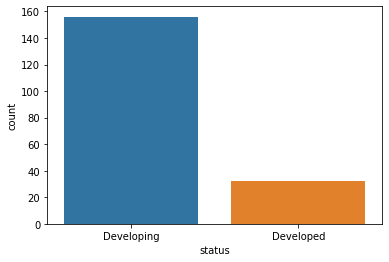

In [43]:
sns.countplot('status', data=df_tot);

развивающихся в 5 раз больше

In [44]:
# посмотрим, как с развитием обстаят дела по регионам
dfc = df_tot.groupby(['region of the territory', 'status'])['reg_ter_n'].count().reset_index()
dfc

,region of the territory,status,reg_ter_n
0,Australia and New Zealand,Developed,2
1,Caribbean,Developing,13
2,Central America,Developing,8
3,Central Asia,Developing,5
4,Eastern Africa,Developing,16
5,Eastern Asia,Developed,1
6,Eastern Asia,Developing,3
7,Eastern Europe,Developed,6
8,Eastern Europe,Developing,4
9,Melanesia,Developing,4


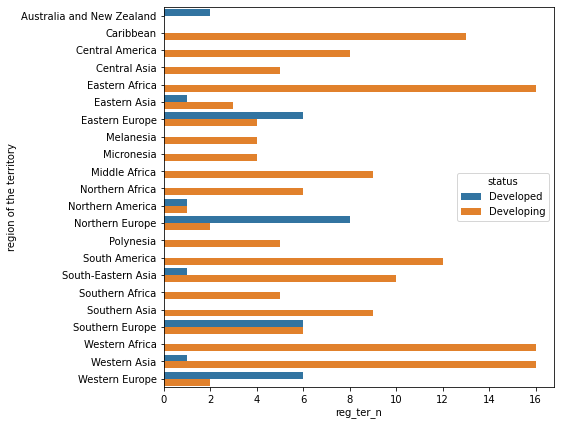

In [45]:
plt.figure(figsize=(7, 7))
sns.barplot(x = "reg_ter_n", y = "region of the territory", hue = 'status', data = dfc);

1. В большенстве регионав нет развитых стран
2. только в Европе, Северной Америке и Австр. и Н.Зеландии соотношение развитх и не развитых в пользу развитых

прсмотрим уроветь потребления:
- по статусу
- по регионам
- порегионам в разрезе статуса

In [46]:
# уровен потребления по статусу
df_tot.groupby('status')['alcohol'].mean()

status
Developed     9.849678
Developing    3.384394
Name: alcohol, dtype: float64

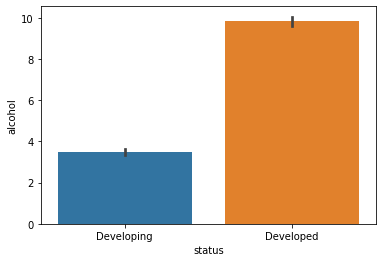

In [47]:
sns.barplot('status', 'alcohol', data=df);

в развитых потребляют алкоголь почти в 3 раза больше

In [48]:
# потребление по региону
df_tot.groupby('region of the territory')['alcohol'].mean().sort_values(ascending=False)

region of the territory
Eastern Europe               10.629933
Western Europe                9.803583
Australia and New Zealand     9.660792
Northern Europe               9.518429
Northern America              8.316333
Southern Europe               7.514086
Caribbean                     6.678308
South America                 5.782111
Eastern Asia                  5.608000
Southern Africa               4.703867
Central America               4.137917
Middle Africa                 3.836963
Eastern Africa                2.774417
Central Asia                  2.700533
Western Africa                2.138333
South-Eastern Asia            2.000712
Western Asia                  1.951961
Melanesia                     0.912667
Polynesia                     0.780267
Southern Asia                 0.664486
Micronesia                    0.651500
Northern Africa               0.648778
Name: alcohol, dtype: float64

In [49]:
# топ-10 регионов по развитым странам
df_tot.groupby('region of the territory')['status_num'].sum().sort_values(ascending = False).head(10)

region of the territory
Northern Europe              8.0
Western Europe               6.0
Eastern Europe               6.0
Southern Europe              6.0
Australia and New Zealand    2.0
Eastern Asia                 1.0
South-Eastern Asia           1.0
Western Asia                 1.0
Northern America             1.0
Middle Africa                0.0
Name: status_num, dtype: float64

За исключением Caribbean, South America и Eastern Asia топ-10 регионов по пртреблению совподает с топ-10 по количеству развитых стран.

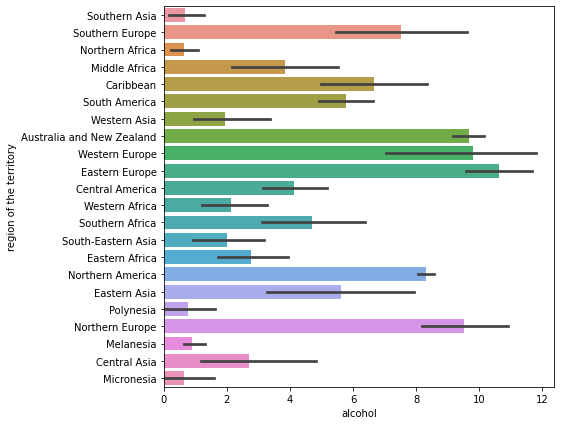

In [50]:
# график потребления по регионам
plt.figure(figsize=(7, 7))
sns.barplot(x = "alcohol", y = "region of the territory", data = df_tot);

очевидно, что в Европпе, Северной Америке и Австралии с Новой Зеландией пьют в разы больше чем в Азии, Африке прочих "...незиях"

In [51]:
# как делется регионы по статусу
dfvvv = df_tot.groupby(['region of the territory', 'status_num'])['alcohol'].mean().reset_index()

dfvvv.sort_values('alcohol', ascending = False)

,region of the territory,status_num,alcohol
29,Western Europe,1.0,11.002333
8,Eastern Europe,1.0,10.793222
7,Eastern Europe,0.0,10.385000
27,Western Asia,1.0,10.260667
24,Southern Europe,1.0,10.139111
0,Australia and New Zealand,1.0,9.660792
16,Northern Europe,1.0,9.577120
15,Northern Europe,0.0,9.283667
14,Northern America,1.0,8.579333
13,Northern America,0.0,8.053333


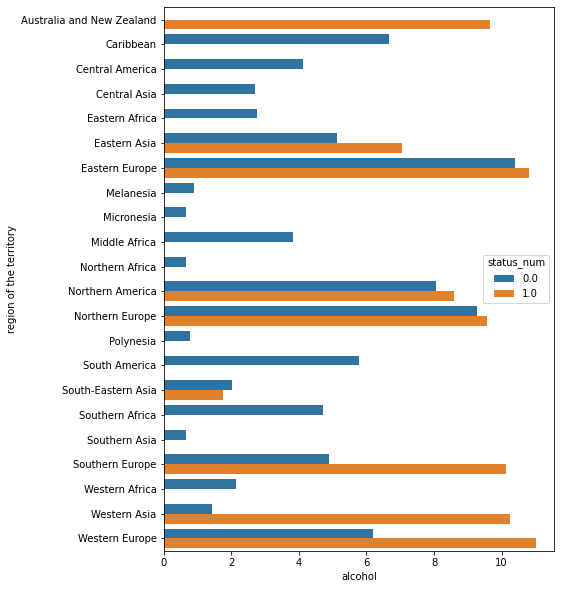

In [52]:
plt.figure(figsize=(7, 10))
sns.barplot(x = "alcohol", y = "region of the territory", hue = 'status_num', data = dfvvv);

In [53]:
# посмотрим, что за азиатская срана так выделяется на воне остальных
df_tot[df_tot['reg_ter_n'] == 21].sort_values(by = 'alcohol', ascending = False).head(1)

,country,status,region of the territory,alcohol,percentage expenditure,total expenditure,status_num,reg_ter_n
43,Cyprus,Developed,Western Asia,10.260667,932.66739,6.76,1.0,21.0


In [54]:
# посмотрим, что за азиатская срана так выделяется на воне остальных
df_tot[df_tot['reg_ter_n'] == 5].sort_values(by = 'alcohol', ascending = False).head(2)

,country,status,region of the territory,alcohol,percentage expenditure,total expenditure,status_num,reg_ter_n
135,Republic of Korea,Developing,Eastern Asia,8.855333,0.000000,5.912000,0.0,5.0
83,Japan,Developed,Eastern Asia,7.040667,3923.050329,6.472667,1.0,5.0


В Заподной с Северной Европе, разница в потреблении между развивающимеся и развитыми странами минимальна, а вот в Южной и Восточной почти в 2 раза, хотя это строны находятся в непостедственной близости друг от друга. Думаю Кипр из Заподной Азии можно смело отнести к Европе, из Азиатских стран ярко выделяются Япония и Ю. Корея.
В остальных регионах пьют значительно меньше, но ваделяется Caribbean.


In [55]:
# посмотрим как распределяются Расходы на здравоохранение в процентах от валового внутреннего продукта на душу населения (%)
dfgg = df_tot.groupby(['region of the territory', 'status_num'])['percentage expenditure'].mean().reset_index()
dfgg

,region of the territory,status_num,percentage expenditure
0,Australia and New Zealand,1.0,4127.187126
1,Caribbean,0.0,247.758414
2,Central America,0.0,428.109562
3,Central Asia,0.0,90.492708
4,Eastern Africa,0.0,89.724009
5,Eastern Asia,0.0,66.654042
6,Eastern Asia,1.0,3923.050329
7,Eastern Europe,0.0,206.139465
8,Eastern Europe,1.0,244.132531
9,Melanesia,0.0,152.220120


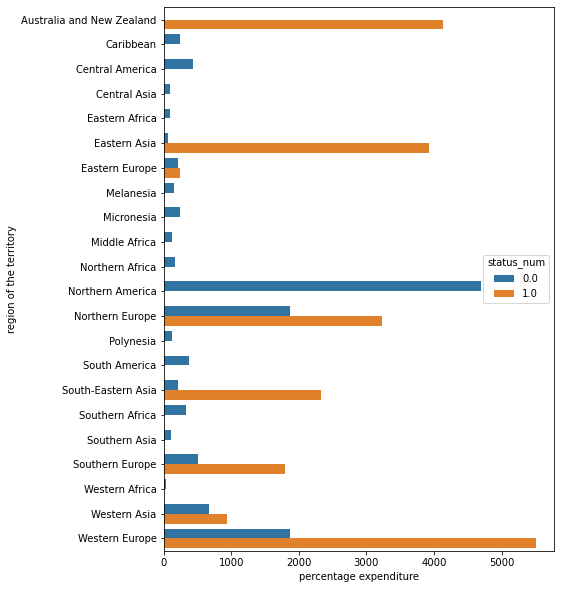

In [56]:
plt.figure(figsize=(7, 10))
sns.barplot(x = "percentage expenditure", y = "region of the territory", hue = 'status_num', data = dfgg);

In [62]:
# хочется посмотреть данные по Северной Америке
df_tot[df_tot['reg_ter_n'] == 0]

,country,status,region of the territory,alcohol,percentage expenditure,total expenditure,status_num,reg_ter_n
30,Canada,Developing,Northern America,8.053333,4694.078971,7.052000,0.0,0.0
179,United States of America,Developed,Northern America,8.579333,0.000000,15.863333,1.0,0.0


Очевидно, что расходы на здравоохранение от ВВП в развитых странах выше чем в развивающихся. Очевидно что Канаду, вряд ли можно назвать развивающейся строной, да и развивающиеся страны в северной Европе по уровню ВВп серьезно должны обгонять развивающиеся страны из других регионов.

In [63]:
dfg1 = df_tot.groupby(['region of the territory', 'status_num'])['total expenditure'].mean().reset_index()
dfg1.head()

,region of the territory,status_num,total expenditure
0,Australia and New Zealand,1.0,8.856333
1,Caribbean,0.0,5.761795
2,Central America,0.0,7.003833
3,Central Asia,0.0,4.850533
4,Eastern Africa,0.0,5.579750


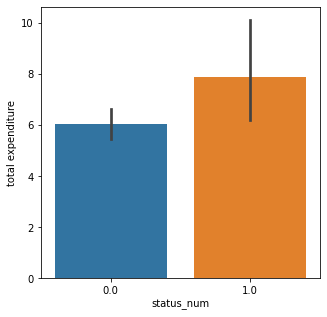

In [65]:
plt.figure(figsize=(5, 5))
sns.barplot(x = "status_num", y = "total expenditure",  data = dfg1);

в среднем расзоди на здравоохранение от общих гос. расходов не сильно разнятся

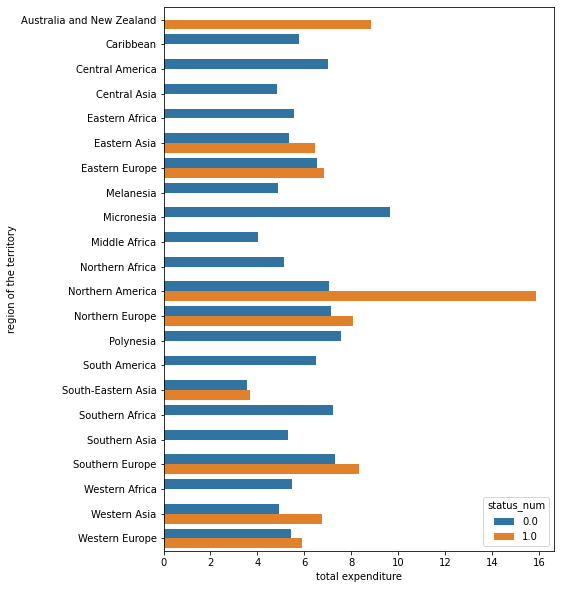

In [66]:
# проверим по регионим
plt.figure(figsize=(7, 10))
sns.barplot(x = "total expenditure", y = "region of the territory", hue = 'status_num', data = dfg1);

В США расходы сильно больше чем в остальных странах, в целом больших перекосов не видно.

### Выводы:
Очевидно, что в развивающихся странах потребление больше.
В Заподной с Северной Европе, разница в потреблении между развивающимеся и развитыми странами минимальна.
Расходы на здравоохранение от ВВП в развитых странах выше чем в развивающихся.
Процент расходов на здравоохранение от бюджета сильно не различается, за исключением США.

### Корреляция признаков

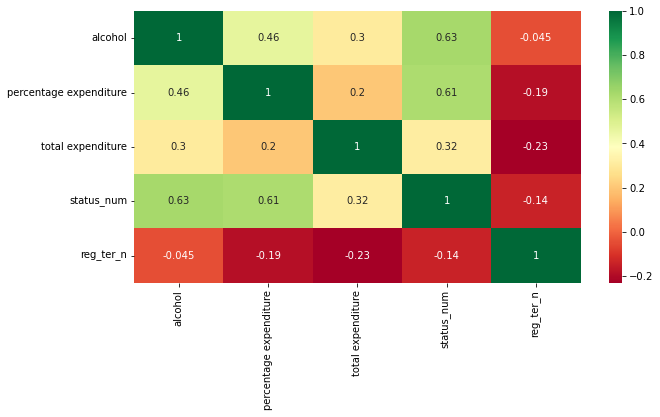

In [58]:
sns.heatmap(df_tot.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Очевидна зависимость потребления от статуса и расходов на здравоохронения, но это мы поняли по предыдущим исследованиям.

Хочется посмотреть есть ли зависимость потребления от региона без деления на статус.

In [74]:
dfss = df_tot.groupby('reg_ter_n')['alcohol'].mean().reset_index()

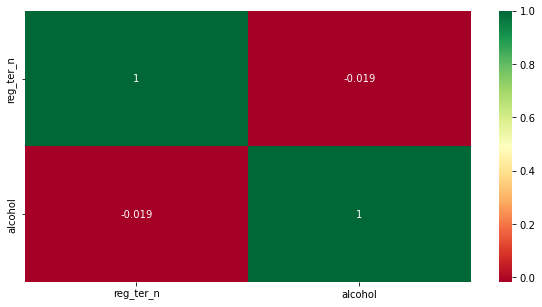

In [72]:
sns.heatmap(dfss.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Корреляции нет.
Хотя я думал, что будет(
В идеале интересно было бы посмотреть на взаимосвязь по религии и по бывшим колониям, но таких данных в нормальном виде не нашел.(думаю она должна быть.)